In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from statsmodels.tsa.arima_model import ARIMA
rcParams['figure.figsize'] = 15, 6
rcParams['axes.labelsize'] = 14
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12
rcParams['text.color'] = 'k'

In [22]:
data = pd.read_csv('tatavg.csv')
print (data.head())
print ('\n Data Types:')
print (data.dtypes)
print (data.size)

          Date  Average Price
0  01-Jan-2018         430.49
1  02-Jan-2018         433.41
2  03-Jan-2018         435.06
3  04-Jan-2018         429.56
4  05-Jan-2018         432.92

 Data Types:
Date              object
Average Price    float64
dtype: object
494


In [23]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
data = pd.read_csv('tatavg.csv', parse_dates=['Date'], index_col='Date')#,date_parser=dateparse)
print (data.head())

            Average Price
Date                     
2018-01-01         430.49
2018-01-02         433.41
2018-01-03         435.06
2018-01-04         429.56
2018-01-05         432.92


In [24]:
data.index

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-08', '2018-01-09', '2018-01-10',
               '2018-01-11', '2018-01-12',
               ...
               '2018-12-18', '2018-12-19', '2018-12-20', '2018-12-21',
               '2018-12-24', '2018-12-26', '2018-12-27', '2018-12-28',
               '2018-12-31', '2019-01-01'],
              dtype='datetime64[ns]', name='Date', length=247, freq=None)

In [25]:
#Converting to time series
ts = data['Average Price']
print(ts.head())

Date
2018-01-01    430.49
2018-01-02    433.41
2018-01-03    435.06
2018-01-04    429.56
2018-01-05    432.92
Name: Average Price, dtype: float64


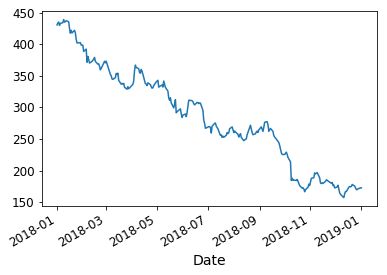

In [26]:
ts.plot()

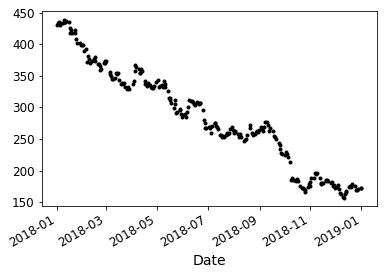

In [27]:
#Visualizing our time series data
ts.plot(style='k.')
plt.show()

In [28]:
#Checking the stationarity of the time series data, techniques are - 
#1) Rolling statistics 
#2) Dickey-Fuller Test
#Clearly there is an increasing trend: taking the Rolling Statistics technique
from statsmodels.tsa.stattools import adfuller

#Creating a function for stationarity check

def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12, center=False).mean()
    #rolmean = pd.rolling_mean(timeseries, window=12)
    #rolstd = pd.rolling_std(timeseries, window=12)
    rolstd = timeseries.rolling(window=12, center=False).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    #print ('Results of Dickey-Fuller Test:')
    #dftest = adfuller(timeseries, autolag='AIC')
    #dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    #for key,value in dftest[4].items():
     #   dfoutput['Critical Value (%s)'%key] = value
    #print (dfoutput)
    
#The function ends here

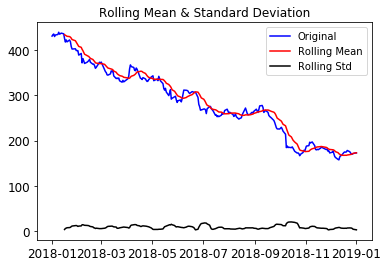

In [29]:
#Calling the function for checking stationarity
test_stationarity(ts)

Date
2018-01-01        NaN
2018-01-02        NaN
2018-01-03        NaN
2018-01-04        NaN
2018-01-05        NaN
2018-01-08        NaN
2018-01-09        NaN
2018-01-10        NaN
2018-01-11        NaN
2018-01-12        NaN
2018-01-15        NaN
2018-01-16   -0.01988
Name: Average Price, dtype: float64

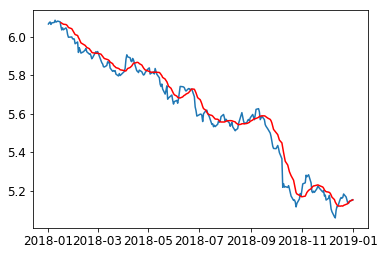

In [30]:
#Making the time series stationary by removing:
#1. Trend and 2. Stationarity
#1. Removing trend : Taking log transform and applying smoothing-moving average
ts_log = np.log(ts)
#Plot after log transform
#plt.plot(ts_log)    
#plotting log transform and moving average together
moving_avg = ts_log.rolling(window=12, center=False).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')
#Taking difference from the original series
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

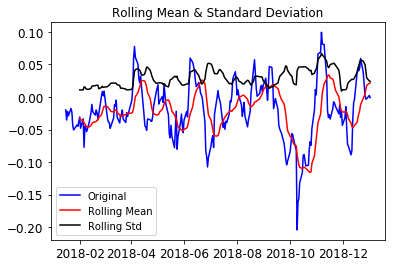

In [31]:
#Dropping the NaN values
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

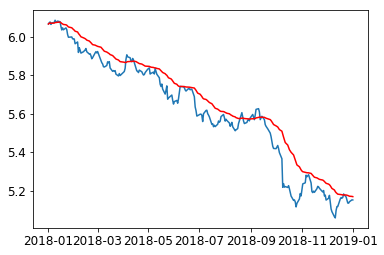

In [32]:
expwighted_avg = ts_log.ewm(halflife=12).mean()
#expwighted_avg = ts_log.ewma(ups, span=RSI_N)[-1]
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

Date
2018-01-01         NaN
2018-01-02    0.006760
2018-01-03    0.003800
2018-01-04   -0.012723
2018-01-05    0.007792
2018-01-08    0.002307
2018-01-09    0.011548
2018-01-10   -0.009614
2018-01-11    0.002022
2018-01-12    0.003254
2018-01-15   -0.003668
2018-01-16   -0.024384
2018-01-17   -0.018069
2018-01-18    0.010985
2018-01-19   -0.010003
2018-01-22    0.009766
2018-01-23   -0.008522
2018-01-24   -0.025815
2018-01-25   -0.014132
2018-01-29    0.001343
2018-01-30   -0.009612
2018-01-31   -0.000100
2018-02-01   -0.000828
2018-02-02   -0.024659
2018-02-05    0.009325
2018-02-06   -0.054523
2018-02-07    0.024840
2018-02-08   -0.012609
2018-02-09   -0.015630
2018-02-12    0.007135
                ...   
2018-11-19    0.018909
2018-11-20    0.012212
2018-11-21   -0.003026
2018-11-22   -0.007059
2018-11-26   -0.019257
2018-11-27    0.007582
2018-11-28   -0.028067
2018-11-29    0.004300
2018-11-30   -0.025735
2018-12-03    0.009341
2018-12-04    0.015094
2018-12-05   -0.035972
2018-1

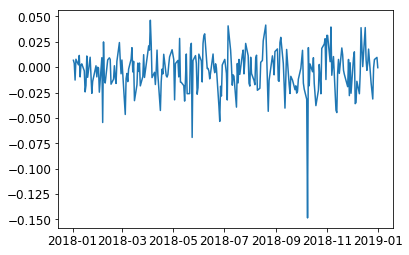

In [33]:
ts_log_diff = ts_log - ts_log.shift()
print(ts_log_diff)
plt.plot(ts_log_diff)

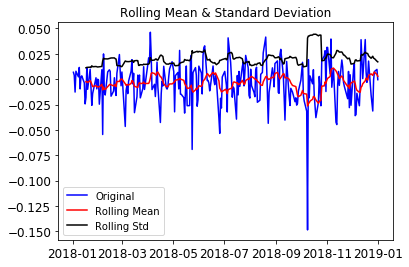

In [34]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

Text(0.5,1,'Autocorrelation Function')

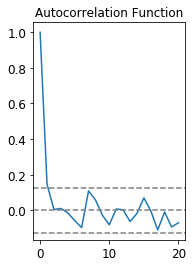

In [35]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

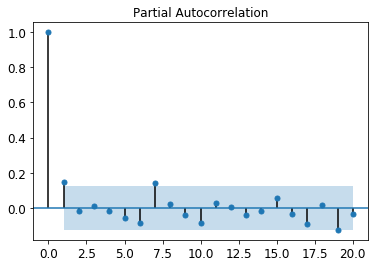

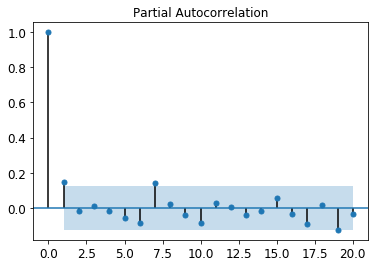

In [36]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#plot pacf
plot_pacf(ts_log_diff, lags = 20)

/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5,1,'RSS: 0.1079')

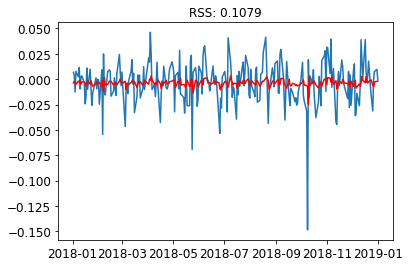

In [37]:
#AR MODEL
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5,1,'RSS: 0.1079')

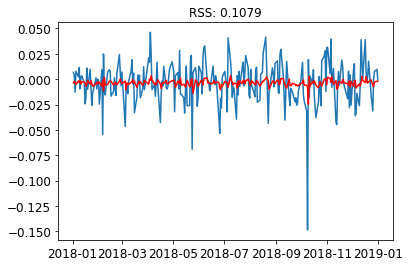

In [38]:
#MA MODEL
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5,1,'RSS: 0.1076')

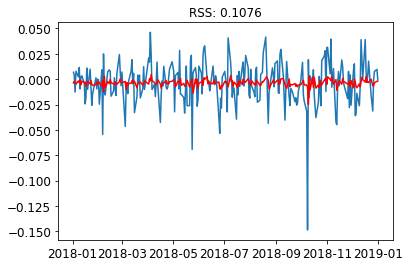

In [39]:
#ARIMA MODEL
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [40]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

Date
2018-01-02   -0.003705
2018-01-03   -0.002178
2018-01-04   -0.002807
2018-01-05   -0.004944
2018-01-08   -0.001740
dtype: float64


In [41]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

Date
2018-01-02   -0.003705
2018-01-03   -0.005884
2018-01-04   -0.008691
2018-01-05   -0.013635
2018-01-08   -0.015375
dtype: float64


In [42]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Date
2018-01-01    6.064924
2018-01-02    6.061219
2018-01-03    6.059041
2018-01-04    6.056233
2018-01-05    6.051289
dtype: float64

Text(0.5,1,'RMSE: 15.1693')

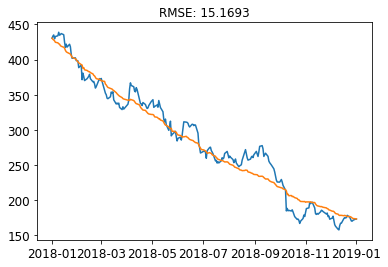

In [43]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

In [50]:
predlen=predictions_ARIMA.shape[0]
for i in range(predlen) :
    print("{ x : " + str(i) + " , y : " + str(predictions_ARIMA[i]) + " },")

{ x : 0 , y : 430.48999999999995 },
{ x : 1 , y : 428.897796728411 },
{ x : 2 , y : 427.9646343619902 },
{ x : 3 , y : 426.7648820924825 },
{ x : 4 , y : 424.66025959009306 },
{ x : 5 , y : 423.9218026503173 },
{ x : 6 , y : 422.48676338133845 },
{ x : 7 , y : 422.08406617324914 },
{ x : 8 , y : 419.8493836038423 },
{ x : 9 , y : 419.0493725093209 },
{ x : 10 , y : 417.5304000594009 },
{ x : 11 , y : 416.2729802354382 },
{ x : 12 , y : 413.23364467201435 },
{ x : 13 , y : 411.21687767786364 },
{ x : 14 , y : 410.34074392390863 },
{ x : 15 , y : 408.4140285209395 },
{ x : 16 , y : 407.88058955723994 },
{ x : 17 , y : 405.78087810857687 },
{ x : 18 , y : 403.28205603033354 },
{ x : 19 , y : 401.0923054795215 },
{ x : 20 , y : 399.98434736519954 },
{ x : 21 , y : 397.9775316914265 },
{ x : 22 , y : 396.9454130627429 },
{ x : 23 , y : 395.4007157006494 },
{ x : 24 , y : 392.8761172576018 },
{ x : 25 , y : 392.28369517005274 },
{ x : 26 , y : 387.53147547964636 },
{ x : 27 , y : 388.6199231

Date
2018-01-02   -0.003706
2018-01-03   -0.002181
2018-01-04   -0.002773
2018-01-05   -0.005171
2018-01-08   -0.001847
dtype: float64
Date
2018-01-02   -0.003706
2018-01-03   -0.005887
2018-01-04   -0.008659
2018-01-05   -0.013830
2018-01-08   -0.015678
dtype: float64


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


Text(0.5,1,'RMSE: 15.3444')

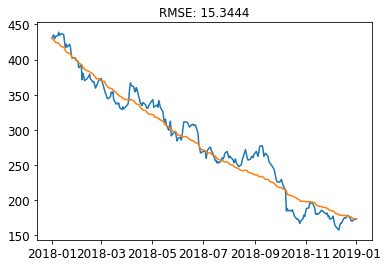

In [44]:
#AR model
predictions_AR_diff = pd.Series(results_AR.fittedvalues, copy=True)
print (predictions_AR_diff.head())
predictions_AR_diff_cumsum = predictions_AR_diff.cumsum()
print (predictions_AR_diff_cumsum.head())
predictions_AR_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_AR_log = predictions_AR_log.add(predictions_AR_diff_cumsum,fill_value=0)
predictions_AR_log.head()
predictions_AR = np.exp(predictions_AR_log)
plt.plot(ts)
plt.plot(predictions_AR)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_AR-ts)**2)/len(ts)))

Date
2018-01-02   -0.003706
2018-01-03   -0.002184
2018-01-04   -0.002808
2018-01-05   -0.005173
2018-01-08   -0.001791
dtype: float64
Date
2018-01-02   -0.003706
2018-01-03   -0.005890
2018-01-04   -0.008698
2018-01-05   -0.013871
2018-01-08   -0.015661
dtype: float64


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


Text(0.5,1,'RMSE: 15.3632')

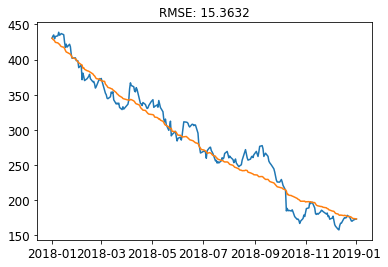

In [45]:
#MA model
predictions_MA_diff = pd.Series(results_MA.fittedvalues, copy=True)
print (predictions_MA_diff.head())
predictions_MA_diff_cumsum = predictions_MA_diff.cumsum()
print (predictions_MA_diff_cumsum.head())
predictions_MA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_MA_log = predictions_MA_log.add(predictions_MA_diff_cumsum,fill_value=0)
predictions_MA_log.head()
predictions_MA = np.exp(predictions_MA_log)
plt.plot(ts)
plt.plot(predictions_MA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_MA-ts)**2)/len(ts)))